In [1]:
import socket
import pandas as pd
import numpy as np
import requests
import time
import re
import tweepy
import spacy
from nltk.stem.snowball import SnowballStemmer
from matplotlib import colors
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 

In [2]:
consumer_key = "I6Yj7n2qw3wSaQz7cL1lC1EDK"
consumer_secret = "QUAX0SNnlIizhOwoFHC0JV5TSgiBZZSV0aow16ZlUcDZo6xHuK"
access_token = "1574466888100450325-EHnDeP8cRkh3dlPEj5fE02VlTn8woi"
access_token_secret = "l7IxwdbQGKoy9EpyL9QTAPwvbJIJzEKNkAapgQGMIGt3w"
bearer_token="AAAAAAAAAAAAAAAAAAAAAJy2hwEAAAAA2ELEayk%2F1sczIFNN6yaXdDx5zBY%3DFDkoEGdDN50IgYKLCJOLI3lcRW4hxyZM2c2ijfLHrcUAQ4KSR5"

In [3]:
nlp = spacy.load('en_core_web_md')
s_stemmer = SnowballStemmer(language='english')

username = 'POTUS'
username = "YutaoZhou_"

client = tweepy.Client(bearer_token=bearer_token, consumer_key=consumer_key,\
                      consumer_secret=consumer_secret, access_token=access_token,\
                     access_token_secret=access_token_secret)
user_id = client.get_user(username=username, user_auth=True).data.id

tweets = client.get_users_tweets(id=user_id, max_results=100, user_auth=True)
texts = []
for tweet in tweets.data:
    texts.append(tweet.text)
orignal_text = " ".join(texts).strip()
total = []
for line in texts:
    line = line.strip().lower().split(" ")
    new_line = list(filter(lambda word : re.match('^[a-zA-Z]+$', word) != None and \
                           word not in nlp.Defaults.stop_words, line))
    new_line = list(map(lambda word : s_stemmer.stem(word), new_line))
    total = total + new_line
while len(total) < 500:
    total = total + total
text_topredict = " ".join(total[:500])

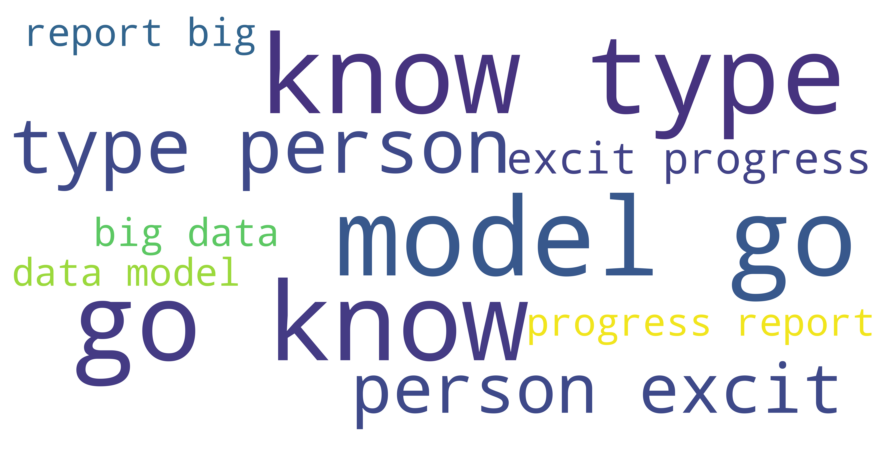

In [5]:
wordcloud = WordCloud(width=2000,height=1000,
                      min_font_size=20,
                      max_font_size=250,
                      max_words=2000,
                      background_color="white", 
                      scale=4).generate(text_topredict)
plt.subplots(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()